Base Band Signal


In [113]:
#Libraries required
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy import signal

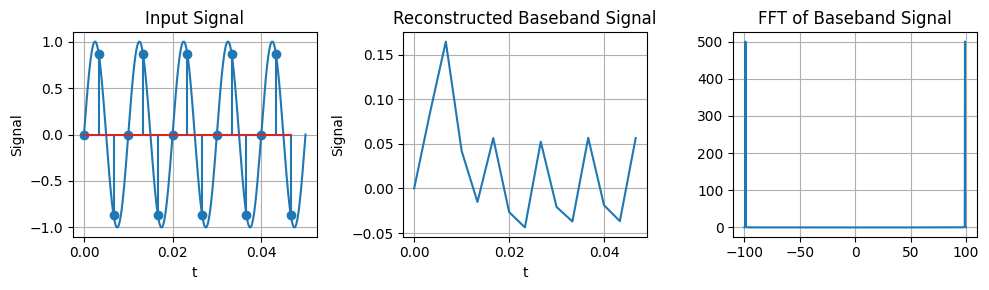

In [114]:
fbp = 100 #Base band signal frequency(Hz)
M = 3
fs = M * fbp #Sampling frequency(Hz) (fs>2fm)
T = 1 / fbp #Time period for Base band signal
T_org = np.linspace(0, 5 * T, 1000)
T_L = np.arange(0, 5 * T, T / M)  #plotting points for base band signal

X = np.sin(np.pi * 2 * fbp * T_org) #base band signal

fig, axs = plt.subplots(1 , 3 , figsize = (10 , 3)) #for aranging the graph 



Ts = 1 / fs #Sampling time
Ts_L = np.arange(0, 5 * T, Ts) #sampling time points

Xs = np.sin(np.pi * 2 * fbp * Ts_L) #sampled signal

#plotting of base band signal
axs[0].plot(T_org,X)
axs[0].stem(Ts_L,Xs)
axs[0].set_title('Input Signal')
axs[0].set_xlabel('t')
axs[0].set_ylabel('Signal')
axs[0].grid(True)

#Reconstructing baseband signal
Wp = (fs / 4) / fs  # pass-band frequency
Ws = (fs - 10) / fs #stop band Frequency
Gpb = 3 #passband gain in db
Gsb = 60 #stopband gain in db

[N, Wn] = signal.buttord(Wp, Ws, Gpb, Gsb) #using butterworth filter order selector

[b,a] = signal.butter(N, Wn, 'low') #LPF constants
Xr = signal.lfilter(b, a, Xs) #Reconstruction of Signal 
axs[1].plot(T_L, Xr)
axs[1].set_title("Reconstructed Baseband Signal")
axs[1].set_xlabel("t")
axs[1].set_ylabel("Signal")
axs[1].grid(True)

s=np.fft.fftfreq(len(X), 1.5 / fs)
s=np.fft.fftshift(s)
X_f = fft(X) 
axs[2].plot(s,abs(X_f))
axs[2].set_title("FFT of Baseband Signal")
axs[2].grid(True)


plt.tight_layout()

Pass Band Signal


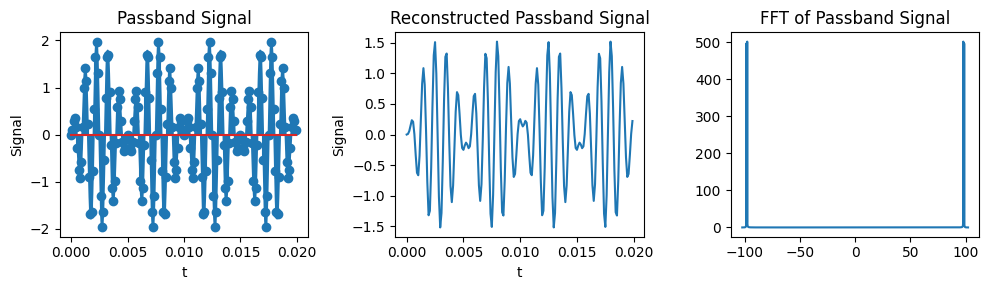

In [134]:
Fpb = 100  #pass band frequency
M1 = 8 #Nyquist constant
A = 1  #Amplitude of Pass band signal
fc = 1000 #Carrier Frequency in Hertz
Ac = 2 # Carrier signal amplitude
fs = M1 * (fc + Fpb) # Sampling frequency
T = 1 / Fpb #Time period of input signal
Ts1 = 1 / fs  # Sampling Period
T_org1 = np.linspace(0, 2 * T, 1000)
t1 = np.arange(0, 2 * T, Ts1) #pass band signal plot points (we use Ts instead of T this to match the size of the array)
ts1 = np.arange(0, 2 * T, Ts1) #Sampled signal plot points
x1 = A * np.sin(2 * np.pi * Fpb * T_org1)  #Passband signal
xc1 = Ac * np.sin(2 * np.pi * fc * T_org1)  #carrier Signal
X1 = np.multiply(x1,xc1) #Resulting Passband Signal


xs1 = A * np.sin(2 * np.pi * Fpb * ts1) #Sampled Passband signal
xcs1 = Ac * np.sin(2 * np.pi* fc * ts1) #sampled Carrier Signal
Xs1 = np.multiply(xs1,xcs1) # Resulting sampled pass band signal

#plotting all graphs side by side
fig, axs = plt.subplots(1, 3, figsize= (10 ,3))

axs[0].plot(T_org1,X1)  #passband Signal
axs[0].stem(ts1,Xs1) #sampled passband signal
axs[0].set_title('Passband Signal')
axs[0].set_xlabel('t')
axs[0].set_ylabel('Signal')


#using the same values for the butterwoth filter in the abve section
Xr1 = signal.lfilter(b,a,Xs1) #reconstruction of passband signal
axs[1].plot(t1,Xr1) #reconstructed passband signal plotting.
axs[1].set_title('Reconstructed Passband Signal')
axs[1].set_xlabel('t')
axs[1].set_ylabel('Signal')

s1=np.fft.fftfreq(len(X1), 43 / fs)
s1=np.fft.fftshift(s1)
X_f1 = fft(X1)  #FFT of passband signal
axs[2].plot(s1,abs(X_f1)) #Plotting FFT signal
axs[2].set_title("FFT of Passband Signal")
plt.tight_layout()
